# Alchemical Energies

In [49]:
import sys
sys.path.insert(0, '/home/sahre/git_repositories/APDFT/prototyping/atomic_energies/')
import utils_qm as uqm
import numpy as np
from matplotlib import pyplot as plt

import pandas as pd

In [50]:
def get_EZ(element, E1, E2):
    comps = ['CC', 'CN', 'CO', 'CF', 'NN', 'NO', 'NF', 'OO', 'OF', 'FF']
    energies = []
    for i in range(len(comps)):
        if element == comps[i][0] and element == comps[i][1]:
            energies.append((E1[i]+E2[i])/2)
        elif element == comps[i][0]:
            energies.append(E1[i])
        elif element == comps[i][1]:
            energies.append(E2[i])
    return(np.array(energies))   

In [51]:
atomic_energies = pd.read_csv('/data/sahre/projects/atomic-energies/data/bonding_trends/alchemy/atomic_energies.csv')

energies_Z = []
for el in ['C', 'N', 'O', 'F']:
    energies_Z.append(get_EZ(el, atomic_energies['Eb_homo_Z1'], atomic_energies['Eb_homo_Z2']))
    
energies_ZH = []
for el in ['C', 'N', 'O', 'F']:
    energies_ZH.append(get_EZ(el, atomic_energies['Eb_homo_Z1_H'], atomic_energies['Eb_homo_Z2_H']))


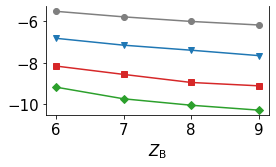

In [52]:
elements = 'heavy'

plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = [4,2]

fig, ax = plt.subplots(1,1)
Z = [6,7,8,9]
el = ['C', 'N', 'O', 'F']
color = ['tab:gray', 'tab:blue', 'tab:red', 'tab:green']
symbol = ['o', 'v', 's', 'D']


if elements == 'hydrogen':
    for i in range(4):
        ax.plot(Z, energies_ZH[i], '--'+symbol[i], color = color[i], label = el[i]+'H')
    
    ax.spines['bottom'].set_visible(False)
    ax.set_xticks([])
    ax.set_xticklabels([])
else:
    for i in range(4):
        ax.plot(Z, energies_Z[i], '-'+symbol[i], color = color[i], label = el[i])
    ax.set_xlabel(r'$Z_{\rm{B}}$')
    #ax.set_ylabel(r'$E_{\rm{A}}^{\rm{el, b}}$ (Ha)')

ax.spines['top'].set_visible(False)
#plt.savefig('/home/sahre/work/bonding_trends/figures/results/alchemical_binding_energies_heavy_homo_b.svg', bbox_inches = 'tight')

In [53]:
# energy in diatomic
eH_H2 = (-1.029154884995695962e+00 + -1.029154960269883290e+00)/2
comps = ['CC', 'CN', 'CO', 'CF', 'NN', 'NO', 'NF', 'OO', 'OF', 'FF']
energies_diatomics = dict()
for c in comps:
    num_h1, num_h2 = uqm.hcount_smiles(c)
    en = np.loadtxt(f'/data/sahre/projects/atomic-energies/data/bonding_trends/alchemy/diatomics/{c}/atomic_energies.txt')[:,-1]
    if c[0] == c[1]: # homo diatomics
        energies_diatomics[f'{c[0]}_{c}'] = (en[0] + en[1])/2 # energy heavy atom A
        energies_diatomics[f'{c[0]}H_{c}'] = (en[2:].sum() + 2*eH_H2)/2#/(2*num_h1+2) # average energy of H's attached to A
        
    else:
        energies_diatomics[f'{c[0]}_{c}'] = en[0] # energy heavy atom A
        energies_diatomics[f'{c[1]}_{c}'] = en[1] # energy heavy atom B
        energies_diatomics[f'{c[0]}H_{c}'] = (en[2:2+num_h1].sum() + eH_H2)#/(num_h1+1) # average energy of H's attached to A
        energies_diatomics[f'{c[1]}H_{c}'] = (en[2+num_h1:].sum() + eH_H2)#/(num_h2+1) # average energy of H's attached to B 
# energy in fragment
energies_fragments = dict()
for c in ['C', 'N', 'O', 'F']:
    en = np.loadtxt(f'/data/sahre/projects/atomic-energies/data/bonding_trends/alchemy/sat_frags/{c}/atomic_energies_sat_frag.txt')[:,-1]
    energies_fragments[c] = en[0] # energy heavy atom A
    energies_fragments[c+'H'] = en[1:].sum()#en[1:].mean() # average energy of H's attached to A
# binding energy
energies_bind = dict()
for k in energies_diatomics.keys():
    frag = k.split('_')[0]
    energies_bind[k] = energies_diatomics[k] - energies_fragments[frag]
    
# get atomic electronic binding energy sorted by nuclear charge of binding partner for all heavy atoms and hydrogens
def key2(x):
    pattern_list = ['CC', 'CN', 'CO', 'CF', 'NN', 'NO', 'NF', 'OO', 'OF', 'FF']
    for i, p in enumerate(pattern_list):
        if p in x:
            return(i)
        
energies_bind_sorted = dict()

for el in ['C', 'N', 'O', 'F']:
    el_list = []
    el_list_H = []
    for k in energies_bind.keys():
        if k.split('_')[0] == el:
            el_list.append(k)
        elif k.split('_')[0] == el+'H':
            el_list_H.append(k)
    
    el_list = sorted(el_list, key=key2)
    el_list_H = sorted(el_list_H, key=key2)
    
    energies_bind_sorted[el] = []
    for k in el_list:
         energies_bind_sorted[el].append(energies_bind[k])
            
    energies_bind_sorted[el+'H'] = []
    for k in el_list_H:
         energies_bind_sorted[el+'H'].append(energies_bind[k]) 

Text(0, 0.5, '$E_{\\rm{A}}^{\\rm{el, b}}$ (Ha)')

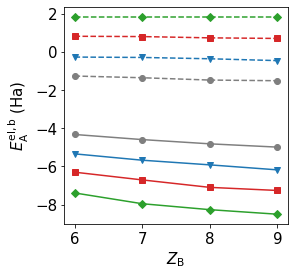

In [54]:
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = [4,4]

fig, ax = plt.subplots(1,1)
Z = [6,7,8,9]
el = ['C', 'N', 'O', 'F']
color = ['tab:gray', 'tab:blue', 'tab:red', 'tab:green']
symbol = ['o', 'v', 's', 'D']
for i in range(4):
    ax.plot(Z, energies_bind_sorted[el[i]], '-'+symbol[i], color = color[i], label = el[i])
    ax.plot(Z, energies_bind_sorted[el[i]+'H'], '--'+symbol[i], color = color[i], label = el[i]+'H')
    
ax.set_xlabel(r'$Z_{\rm{B}}$')
ax.set_ylabel(r'$E_{\rm{A}}^{\rm{el, b}}$ (Ha)')
#ax.legend(bbox_to_anchor = [1.05, 1])
#plt.savefig('/home/sahre/work/bonding_trends/figures/results/alchemical_binding_energies_heavy.svg', bbox_inches = 'tight')

# Fit of binding energy

In [75]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import sys
sys.path.insert(0, '/home/sahre/git_repositories/APDFT/prototyping/atomic_energies/')
import utils_qm as uqm
import bt_tools as bt

In [76]:
# load data

In [87]:
data = pd.read_csv('/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/energies_homolytic.csv')
data_2 = data.loc[(data['Z1'] >= 6) & (data['Z1'] <= 9) & (data['Z2'] >= 6) & (data['Z2'] <= 9)].to_dict('list')
data_3 = data.loc[(data['Z1'] >= 14) & (data['Z2'] >= 14) & (data['Z1'] <= 17) & (data['Z2'] <= 17)].to_dict('list')
data_4 = data.loc[(data['Z1'] >= 32) & (data['Z2'] >= 32) & (data['Z1'] <= 35) & (data['Z2'] <= 35)].to_dict('list')
data_234 = data.loc[(data['Z1'] <= 9) & (data['Z2'] <= 9) | (data['Z1'] >= 14) & (data['Z2'] >= 14) & (data['Z1'] <= 17) & (data['Z2'] <= 17) | (data['Z1'] >= 32) & (data['Z2'] >= 32) & (data['Z1'] <= 35) & (data['Z2'] <= 35)].to_dict('list')

for d in [data_2, data_3, data_4, data_234]:
    d['unit'] = 630
    d['bfe type'] = 'homo'
    #d['nbfe'] = np.array(d['Z1'])*np.array(d['Z2'])-(np.array(d['Z1'])+np.array(d['Z2']))

In [88]:
# do linear fits
b2 = bt.BDE_clean.fromdict(data_2)
b3 = bt.BDE_clean.fromdict(data_3)
b4 = bt.BDE_clean.fromdict(data_4)
for b in [b2, b3, b4]:
    b.linear_fit()
    rounded_MAE = np.round((np.abs(b.bde-b.bde_fitted)).mean(),2)
    rounded_MAE_std = np.round(rounded_MAE/b.bde.std(), 2)
    print(f'MAE = {rounded_MAE} ({rounded_MAE_std})')

MAE = 0.51 (0.02)
MAE = 0.39 (0.03)
MAE = 0.33 (0.03)


In [89]:
(0.51+0.39+0.33)/3

0.41

In [90]:
# rounding of paramenters for table in paper
for b in [b2, b3, b4]:
    print(np.round(np.abs((np.round(b.linear_params, 2)@b.coeff_mat.T + b.nbfe) - b.bfe).mean(),1))
    
print("MAE", (0.5+0.4+0.4)/3)

0.5
0.4
0.4
MAE 0.43333333333333335


In [91]:
for n, b in zip([2,3,4], [b2, b3, b4]):
    rounded_params = np.round(b.linear_params, 2)
    row_vals = f"{n} & "
    for i in range(4):
        if i < 3:
            row_vals += f'({rounded_params[i]}, {rounded_params[i+4]}) & '
        else:
            row_vals += f'({rounded_params[i]}, {rounded_params[i+4]}) \\\\'
    print(row_vals)

2 & (-207.46, -1863.63) & (-269.67, -2171.83) & (-324.3, -2482.86) & (-398.27, -2792.88) \\
3 & (-188.96, -4399.26) & (-246.49, -4710.67) & (-347.19, -5020.47) & (-444.91, -5330.66) \\
4 & (-183.9, -10075.38) & (-221.21, -10389.11) & (-350.31, -10700.56) & (-488.04, -11011.83) \\


In [92]:
row_vals

'4 & (-183.9, -10075.38) & (-221.21, -10389.11) & (-350.31, -10700.56) & (-488.04, -11011.83) \\\\'

In [93]:
# non-linear fits

def non_linear_model(var, a, b, c):
    Z1, Z2 = var.T
    gamma = 7/3
    ebfe = -a**2 - b**2*Z1*Z2 - c**2*(Z1**(gamma)+Z2**(gamma))
    return(ebfe)

# do linear fits
b2_nl = bt.BDE_clean.fromdict(data_2)
b3_nl = bt.BDE_clean.fromdict(data_3)
b4_nl = bt.BDE_clean.fromdict(data_4)

for b in [b2_nl, b3_nl, b4_nl]:
    b.fit(non_linear_model, p0 = [33.3052603 , 24.97639216,  0.90171214])
    #print('MAE = ' + str((np.abs(b.bde-b.bde_fitted)).mean()))
    rounded_MAE = np.round((np.abs(b.bde-b.bde_fitted)).mean(),2)
    rounded_MAE_std = np.round(rounded_MAE/b.bde.std(), 2)
    print(f'MAE = {rounded_MAE} ({rounded_MAE_std})')

MAE = 1.0 (0.04)
MAE = 2.35 (0.17)
MAE = 2.17 (0.21)


In [94]:
(1+2.35+2.17)/3

1.8399999999999999

In [96]:
# error including III main group
(5.86+5.94+3.57)/3

5.123333333333334

In [11]:
# a = []
# b_param = []
# c = []
# for b in [b2_nl, b3_nl, b4_nl]:
#     a.append((b.params[0]**2)[0])
#     b_param.append((b.params[0]**2)[1]-630)
#     c.append((b.params[0]**2)[2])
    
# parameter_table = pd.DataFrame({'a':a, 'b':b_param, 'c':c})
# parameter_table.to_csv('/data/sahre/projects/atomic-energies/data/bonding_trends/other_data/params_nl.csv')

#### Pauling

In [19]:
chi = {'H':2.1, 'Li':1.0, 'B':2.0, 'C':2.5, 'N':3.0, 'O':3.5, 'F':4.0, 'Si':1.8, 'P':2.1, 'S':2.5, 'Cl':3.0,
      'Ge':1.8, 'As':2.0, 'Se':2.4, 'Br':2.8, 'I':2.5}

Z2el = {5:'B', 6:'C', 7:'N', 8:'O', 9:'F', 14:'Si', 15:'P', 16:'S', 17:'Cl', 32:'Ge', 33:'As', 34:'Se', 35:'Br'}

def pauling_model(data):
    energies_pauling = []
    for ZA, ZB in zip(data['Z1'],data['Z2']):

        # get energy ZAZA and ZBZB
        E_AA = -data.loc[(data['Z1']==ZA) & (data['Z2']==ZA), 'bfe'].item()*630
        E_BB = -data.loc[(data['Z1']==ZB) & (data['Z2']==ZB), 'bfe'].item()*630
        # get chi_A, B
        el_A = Z2el[ZA]
        el_B = Z2el[ZB]

        chi_A = chi[el_A]
        chi_B = chi[el_B]
        # calculate bond energy
        E_AB = (E_AA + E_BB)/2 + 23*(chi_A - chi_B)**2
        energies_pauling.append(E_AB)
    energies_pauling = np.array(energies_pauling)
    return(energies_pauling)

def get_error(pred, ref, digits=2):
    MAE = np.round(np.abs(pred-ref).mean(), digits)
    MAE_std = np.round(np.abs(pred-ref).mean()/ref.std(), digits)
    return(MAE, MAE_std)

pauling_2 = pauling_model(pd.DataFrame(data_2))
MAE_2, MAE_std_2 = get_error(pauling_2, b2_nl.bde, digits=2)
print(f'MAE = {MAE_2} ({MAE_std_2})')

pauling_3 = pauling_model(pd.DataFrame(data_3))
MAE_3, MAE_std_3 = get_error(pauling_3, b3_nl.bde, digits=2)
print(f'MAE = {MAE_3} ({MAE_std_3})')

pauling_4 = pauling_model(pd.DataFrame(data_4))
MAE_4, MAE_std_4 = get_error(pauling_4, b4_nl.bde, digits=2)
print(f'MAE = {MAE_4} ({MAE_std_4})')

MAE = 1.45 (0.06)
MAE = 2.03 (0.15)
MAE = 0.62 (0.06)


In [21]:
def pauling_delta_chi(data):
    delta_chi = []
    for ZA, ZB in zip(data['Z1'],data['Z2']):

        # get chi_A, B
        el_A = Z2el[ZA]
        el_B = Z2el[ZB]

        chi_A = chi[el_A]
        chi_B = chi[el_B]
        # calculate bond energy

        delta_chi.append(np.abs(chi_A-chi_B))
    delta_chi = np.array(delta_chi)
    return(delta_chi)


In [30]:
chi_2 = pauling_delta_chi(pd.DataFrame(data_2))
chi_3 = pauling_delta_chi(pd.DataFrame(data_3))
chi_4 = pauling_delta_chi(pd.DataFrame(data_4))

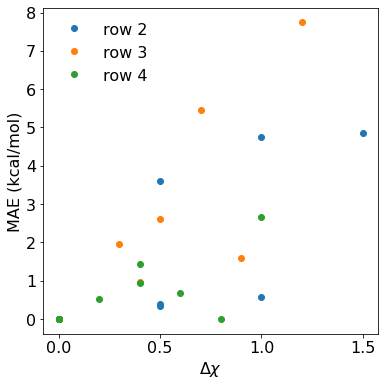

In [40]:
plt.rcParams['figure.figsize'] = [6,6]
plt.rcParams['font.size'] = 16
plt.plot(chi_2, np.abs(pauling_2-b2_nl.bde), 'o', label = 'row 2')
plt.plot(chi_3, np.abs(pauling_3-b3_nl.bde), 'o', label = 'row 3')
plt.plot(chi_4, np.abs(pauling_4-b4_nl.bde), 'o', label = 'row 4')

plt.xlabel(r'$\Delta \chi$')
plt.ylabel(r'MAE (kcal/mol)')
plt.legend(frameon = False)

plt.savefig(f'/home/sahre/work/bonding_trends/figures/results/chi_vs_MAE.png', bbox_inches = 'tight')

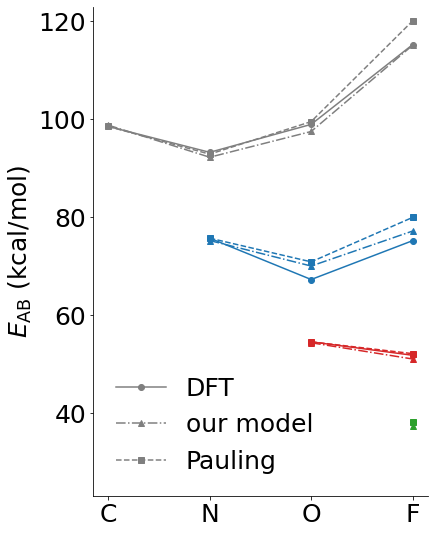

In [18]:
row = 2

if row == 2:
    bd = b2
    bd_nl = b2_nl
    ZB = [6,7,8,9]
#     ZB = [5, 6,7,8,9]
    color = ['#7f7f7fff', '#1f77b4ff', '#d62728ff', '#2ca02cff']
    pauling = pauling_2
    xlabel = ['C', 'N', 'O', 'F']
elif row == 3:
    bd = b3
    bd_nl = b3_nl
    ZB = [14, 15, 16, 17]
    pauling = pauling_3
    color = ['#ecbe90ff', '#df770eff', '#d5d528ff', '#1ca01cff']
    xlabel = ['Si', 'P', 'S', 'Cl']
elif row == 4:
    bd = b4
    bd_nl = b4_nl
    ZB = [32, 33, 34, 35]
    pauling = pauling_4
    color = ['#567676ff', '#a977c8ff', '#f4a51dff', '#942a2aff']
    xlabel = ['Ge', 'As', 'Se', 'Br']
    

plt.rcParams['figure.figsize'] = [6,9]
plt.rcParams['font.size'] = 25

fig, ax = plt.subplots(1,1)


ax.plot(ZB,bd.bde[0:4], '-o', color = color[0], label = 'DFT')
# ax.plot(ZB,bd.bde_fitted[0:4], '--v', color = color[0], label = 'Model 1')
ax.plot(ZB,bd_nl.bde_fitted[0:4], '-.^', color = color[0], label = 'our model')
ax.plot(ZB,pauling[0:4], '--s', color = color[0], label = 'Pauling')

ax.plot(ZB[1:],bd.bde[4:7], '-o', color = color[1])
# ax.plot(ZB[1:],bd.bde_fitted[4:7], '--v', color = color[1])
ax.plot(ZB[1:],bd_nl.bde_fitted[4:7], '-.^', color = color[1])
ax.plot(ZB[1:],pauling[4:7], '--s', color = color[1])

ax.plot(ZB[2:],bd.bde[7:9], '-o', color = color[2])
# ax.plot(ZB[2:],bd.bde_fitted[7:9], '--v', color = color[2])
ax.plot(ZB[2:],bd_nl.bde_fitted[7:9], '-.^', color = color[2])
ax.plot(ZB[2:],pauling[7:9], '--s', color = color[2])

ax.plot(ZB[3:],bd.bde[9:10], '-o', color = color[3])
# ax.plot(ZB[3:],bd.bde_fitted[9:10], '--s', color = color[3])
ax.plot(ZB[3:],bd_nl.bde_fitted[9:10], '-.^', color = color[3])
ax.plot(ZB[3:],pauling[9:10], '--s', color = color[3])

# ax.set_xlabel(r'$Z_{\rm{B}}$')
ax.set_xticks(ZB)
ax.set_xticklabels(xlabel)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

if row > 2:
    ax.spines['left'].set_visible(False)
    ax.set_yticklabels([])
    ax.set_yticks([])
else:
    ax.set_ylabel(r'$E_{\rm{AB}}$ (kcal/mol)')
#ax.legend(frameon = False)

ax.set_ylim([23, 123])
# plt.savefig(f'/home/sahre/work/bonding_trends/figures/results/r{row}_nl_pauling_pbe0_models_5.0.svg', bbox_inches = 'tight')

# ax.legend(frameon = False)
# plt.savefig(f'/home/sahre/work/bonding_trends/figures/results/legend.svg', bbox_inches = 'tight')

In [ ]:
row = 2

if row == 2:
    bd = b2
    bd_nl = b2_nl
    ZB = [6,7,8,9]
    color = ['tab:gray', 'tab:blue', 'tab:red', 'tab:green']
elif row == 3:
    bd = b3
    bd_nl = b3_nl
    ZB = [14, 15, 16, 17]
    color = ['#ecbe90ff', '#df770eff', '#d5d528ff', '#1ca01cff']
elif row == 4:
    bd = b4
    bd_nl = b4_nl
    ZB = [32, 33, 34, 35]
    color = ['#567676ff', '#a977c8ff', '#f4a51dff', '#942a2aff']
    

plt.rcParams['figure.figsize'] = [6,6]
plt.rcParams['font.size'] = 18

fig, ax = plt.subplots(1,1)


ax.plot(ZB,bd.bde[0:4], '-o', color = color[0], label = 'Truth', fillstyle='full')
ax.plot(ZB,bd.bde_fitted[0:4], '--v', color = color[0], label = 'Model 1', fillstyle='full')
ax.plot(ZB,bd_nl.bde_fitted[0:4], '-.^', color = color[0], label = 'Model 2', fillstyle='full')

ax.plot(ZB[1:],bd.bde[4:7], '-o', color = color[1])
ax.plot(ZB[1:],bd.bde_fitted[4:7], '--v', color = color[1])
ax.plot(ZB[1:],bd_nl.bde_fitted[4:7], '-.^', color = color[1])

ax.plot(ZB[2:],bd.bde[7:9], '-o', color = color[2])
ax.plot(ZB[2:],bd.bde_fitted[7:9], '--v', color = color[2])
ax.plot(ZB[2:],bd.bde_fitted[7:9], '-.^', color = color[2])

ax.plot(ZB[3:],bd.bde[9:10], '-o', color = color[3], fillstyle='full')
ax.plot(ZB[3:],bd_nl.bde_fitted[9:10], '--v', color = color[3], fillstyle='full')
ax.plot(ZB[3:],bd_nl.bde_fitted[9:10], '-.^', color = color[3], fillstyle='full')

#ax.set_ylim([35, 117])

ax.set_xlabel(r'$Z_{\rm{B}}$')
ax.set_ylabel(r'$E_{\rm{AB}}$ (kcal/mol)')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(frameon = False)
ax.set_ylim([23, 123])

# plt.savefig('/home/sahre/work/bonding_trends/figures/results/r3_all_models_fixed_y_narrow.svg', bbox_inches = 'tight')

In [ ]:
row = 3

if row == 2:
    bd = b2
    bd_nl = b2_nl
    ZB = [6,7,8,9]
    color = ['tab:gray', 'tab:blue', 'tab:red', 'tab:green']
elif row == 3:
    bd = b3
    bd_nl = b3_nl
    ZB = [14, 15, 16, 17]
    color = ['#ecbe90ff', '#df770eff', '#d5d528ff', '#1ca01cff']
elif row == 4:
    bd = b4
    bd_nl = b4_nl
    ZB = [32, 33, 34, 35]
    color = ['#567676ff', '#a977c8ff', '#f4a51dff', '#942a2aff']
    

plt.rcParams['figure.figsize'] = [6,6]
plt.rcParams['font.size'] = 18

fig, ax = plt.subplots(1,1)


ax.plot(ZB,bd.bde[0:4], '-o', color = color[0], label = 'Truth', fillstyle='full')
ax.plot(ZB,bd.bde_fitted[0:4], '--v', color = color[0], label = 'Model 1', fillstyle='full')
#ax.plot(ZB,bd_nl.bde_fitted[0:4], '-.^', color = color[0], label = 'Model 2', fillstyle='full')

ax.plot(ZB[1:],bd.bde[4:7], '-o', color = color[1])
ax.plot(ZB[1:],bd.bde_fitted[4:7], '--v', color = color[1])
#ax.plot(ZB[1:],bd_nl.bde_fitted[4:7], '-.^', color = color[1])

ax.plot(ZB[2:],bd.bde[7:9], '-o', color = color[2])
ax.plot(ZB[2:],bd.bde_fitted[7:9], '--v', color = color[2])
#ax.plot(ZB[2:],bd.bde_fitted[7:9], '-.^', color = color[2])

ax.plot(ZB[3:],bd.bde[9:10], '-o', color = color[3], fillstyle='full')
ax.plot(ZB[3:],bd_nl.bde_fitted[9:10], '--v', color = color[3], fillstyle='full')
#ax.plot(ZB[3:],bd_nl.bde_fitted[9:10], '-.^', color = color[3], fillstyle='full')

#ax.set_ylim([35, 117])

ax.set_xlabel(r'$Z_{\rm{B}}$')
ax.set_ylabel(r'$E_{\rm{AB}}$ (kcal/mol)')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(frameon = False)
ax.set_ylim([23, 123])

#plt.savefig(f'/home/sahre/work/bonding_trends/figures/results/blm_{row}.svg', bbox_inches = 'tight')

# Compare Models

In [41]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import sys
sys.path.insert(0, '/home/sahre/git_repositories/APDFT/prototyping/atomic_energies/')
import utils_qm as uqm
import bt_tools as bt

import importlib
importlib.reload(bt)

<module 'bt_tools' from '/home/sahre/git_repositories/APDFT/prototyping/atomic_energies/bt_tools.py'>

In [42]:
W4_17 = pd.read_csv('/data/sahre/projects/atomic-energies/data/bonding_trends/other_data/W4-17.csv')
bde_W4_17 = -np.array(W4_17['bfe'])

G2 = pd.read_csv('/data/sahre/projects/atomic-energies/data/bonding_trends/other_data/G2.csv')
bde_G2 = -np.array(G2['bfe'])

data_pbe0 = pd.read_csv('/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/energies_homolytic.csv')
data_pbe0 = data_pbe0.loc[(data_pbe0['Z1'] >= 6) & (data_pbe0['Z2'] >= 6) & (data_pbe0['Z1'] <= 9) & (data_pbe0['Z2'] <= 9)].to_dict('list')
bde_pbe0 = -630*np.array(data_pbe0['bfe'])

data_pm7 = uqm.load_obj('/data/sahre/projects/atomic-energies/data/bonding_trends/pm7/bde_pm7_corrected')
bde_pm7 = np.array(list(data_pm7.values()))

data_pauling = uqm.load_obj('/data/sahre/projects/atomic-energies/data/bonding_trends/other_data/pauling_2_W4-17')
bde_pauling = np.array(list(data_pauling.values()))

data_ml = uqm.load_obj('/data/sahre/projects/atomic-energies/data/bonding_trends/other_data/bde_ml_W4-17_gaussian_bob')
bde_ml = data_ml['BDE (kcal/mol)']

data_nlSRL = uqm.load_obj('/data/sahre/projects/atomic-energies/data/bonding_trends/other_data/bde_nlSRL_l1o')
bde_nlSRL = np.array(list(data_nlSRL.values()))


In [43]:
mae_g2 = np.nanmean(np.abs(bde_W4_17-bde_G2))
mae_pbe0 = (np.abs(bde_W4_17-bde_pbe0)).mean()
mae_pm7 = (np.abs(bde_W4_17-bde_pm7)).mean()

mae_pauling = (np.abs(bde_W4_17-bde_pauling)).mean()
mae_ml = (np.abs(bde_W4_17-bde_ml)).mean()
mae_nlSRL = (np.abs(bde_W4_17-bde_nlSRL)).mean()


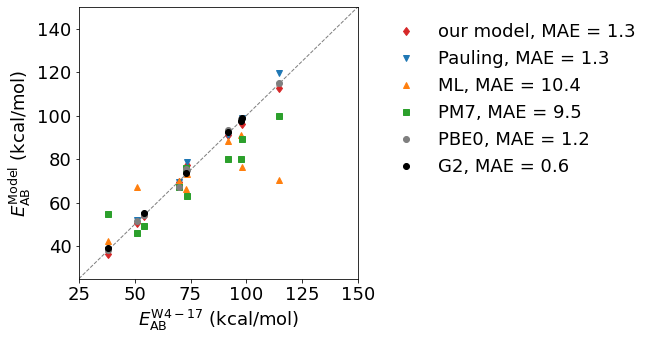

In [47]:
plt.rcParams['font.size'] = 18
plt.rcParams['figure.figsize'] = [5,5]

fig, ax = plt.subplots(1,1)

ref = [25, 150]#np.linspace(np.amin(bde_W4_17), np.amax(bde_W4_17), 3)

ax.plot(ref, ref, '--', color = 'tab:gray', linewidth= 1)

ax.plot(bde_W4_17, bde_nlSRL, 'd', color = 'tab:red', label = f'our model, MAE = {np.round(mae_nlSRL,1)}')
ax.plot(bde_W4_17, bde_pauling, 'v', color = 'tab:blue', label = f'Pauling, MAE = {np.round(mae_pauling,1)}')
ax.plot(bde_W4_17, bde_ml, '^', color = 'tab:orange', label = f'ML, MAE = {np.round(mae_ml,1)}')
ax.plot(bde_W4_17, bde_pm7, 's', color = 'tab:green', label = f'PM7, MAE = {np.round(mae_pm7,1)}')
ax.plot(bde_W4_17, bde_pbe0, 'o', color = 'tab:gray', label = f'PBE0, MAE = {np.round(mae_pbe0,1)}')
ax.plot(bde_W4_17, bde_G2, 'o', color = 'black', label = f'G2, MAE = {np.round(mae_g2,1)}')


ax.set_xlabel(r'$E_{\rm{AB}}^{\rm{W4-17}}$ (kcal/mol)')
ax.set_ylabel(r'$E_{\rm{AB}}^{\rm{Model}}$ (kcal/mol)')

ax.set_xlim([25,150])
ax.set_ylim([25,150])

ax.legend(bbox_to_anchor=(1.05, 1.0), frameon = False)

# plt.savefig('/home/sahre/work/bonding_trends/figures/results/comparison_row2.png', bbox_inches = 'tight')

In [ ]:
bde_ml

## Robustness of fit

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import sys
sys.path.insert(0, '/home/sahre/git_repositories/APDFT/prototyping/atomic_energies/')
import utils_qm as uqm
import bt_tools as bt

import importlib
importlib.reload(bt)

In [ ]:
data_pbe0 = pd.read_csv('/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/all_energies.csv')
data_pbe0 = data_pbe0.loc[(data_pbe0['Z1'] <= 9) & (data_pbe0['Z2'] <= 9)].to_dict('list')
data_pbe0['unit'] = 630
b_pbe0_nl = bt.BDE_clean.fromdict(data_pbe0)
# data_W4_17 = pd.read_csv('/data/sahre/projects/atomic-energies/data/bonding_trends/other_data/W4-17.csv').to_dict('list')
# data_G2 = pd.read_csv('/data/sahre/projects/atomic-energies/data/bonding_trends/other_data/G2.csv').to_dict('list')
# data_W4_17['unit'] = 1
# data_G2['unit'] = 1


In [ ]:
def train(self, tr_ind, model, p0 = None):
    if p0 is not None:
        self.params_tr = curve_fit(model, self.xdata[tr_ind], self.ebfe[tr_ind], p0, maxfev=100000)
    else:
        self.params_tr = curve_fit(model, self.xdata[tr_ind], self.ebfe[tr_ind])

    self.ebfe_fitted_tr = model(self.xdata[tr_ind], *self.params_tr[0])
    self.bde_fitted_tr = -(self.ebfe_fitted_tr + self.nbfe[tr_ind])
    self.mae_tr = np.abs(self.bde_fitted_tr-self.bde[tr_ind]).mean()
    
def predict(self, test_ind, model):
    self.ebfe_fitted_test = model(self.xdata[test_ind], *self.params_tr[0])
    self.bde_fitted_test = -(self.ebfe_fitted_test + self.nbfe[test_ind])
    self.mae_test = np.abs(self.bde_fitted_test-self.bde[test_ind]).mean()
    
def get_cv(num_cv, tr_size, data):
    mae_tr = []
    mae_test = []
    for i in range(num_cv):
        all_ind = np.arange(10)
        np.random.shuffle(all_ind)
        tr_ind, test_ind = np.sort(all_ind[:tr_size]), np.sort(all_ind[tr_size:])

        data.train(tr_ind, non_linear_model)
        data.predict(test_ind, non_linear_model)

        mae_tr.append(data.mae_tr)
        mae_test.append(data.mae_test)

    return(np.array(mae_tr).mean(), np.array(mae_test).mean(), np.array(mae_tr).std(), np.array(mae_test).std())

In [ ]:
mae_tr = []
mae_test = []

std_tr = []
std_test = []

for tr_size in [3, 4, 5, 6, 7, 8, 9, 10]:
    tr, test, trs, tests = get_cv(10, tr_size, b_pbe0_nl)
    mae_tr.append(tr)
    mae_test.append(test)
    
    std_tr.append(trs)
    std_test.append(tests)

In [ ]:
plt.rcParams['font.size'] = 15
plt.errorbar([3, 4, 5, 6, 7, 8, 9, 10], mae_tr,std_tr, x_err = None, marker = 'o', label = 'training')
plt.errorbar([3, 4, 5, 6, 7, 8, 9, 10], mae_test,std_test, x_err = None, marker = 'o', label = 'test')
plt.xlabel(r'$N$')
plt.ylabel('MAE (kcal/mol)')
plt.legend(frameon = False)

# plt.savefig('/home/sahre/work/bonding_trends/figures/results/robustness.svg', bbox_inches = 'tight')

# Molecular structures

In [ ]:
import ase.io as aio
from ase.visualize import view

In [ ]:

comps = ['CC', 'CN', 'CO', 'CF', 'NN', 'NO', 'NF', 'OO', 'OF', 'FF']

for c in comps:
    view(aio.read(f'/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/row_2/diatomics_single/{c}_opt.xyz'))

# Plot of slope m vs Z and intercept n vs Z

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from ase.units import Bohr
from scipy.stats import linregress

import sys
sys.path.insert(0, '/home/sahre/git_repositories/APDFT/prototyping/atomic_energies/')
import utils_qm as uqm
import bt_tools as bt

In [9]:
def get_nbfe(charges):
    nbfe = []
    for i in range(len(charges)):
        for j in range(i, len(charges)):
            nbfe.append(charges[i]*charges[j])
            
    return(np.array(nbfe))

def linear_fit(b):
    charges = sorted(list(set(b.Z1)))
    m = b.linear_params[4:]

    out = linregress(charges, m)
    x = np.linspace(0, 36, 10)
    linf = out[0]*x+out[1]
    return(x, linf)



In [10]:
data = pd.read_csv('/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/all_energies.csv')
data_2 = data.loc[(data['Z1'] <= 9) & (data['Z2'] <= 9)].to_dict('list')
data_3 = data.loc[(data['Z1'] >= 14) & (data['Z2'] >= 14) & (data['Z1'] <= 17) & (data['Z2'] <= 17)].to_dict('list')
data_4 = data.loc[(data['Z1'] >= 32) & (data['Z2'] >= 32) & (data['Z1'] <= 35) & (data['Z2'] <= 35)].to_dict('list')
data_234 = data.loc[(data['Z1'] <= 9) & (data['Z2'] <= 9) | (data['Z1'] >= 14) & (data['Z2'] >= 14) & (data['Z1'] <= 17) & (data['Z2'] <= 17) | (data['Z1'] >= 32) & (data['Z2'] >= 32) & (data['Z1'] <= 35) & (data['Z2'] <= 35)].to_dict('list')

for d in [data_2, data_3, data_4, data_234]:
    d['unit'] = 630
    d['bfe type'] = 'isodesmic'

for d, s in zip([data_2, data_3, data_4, data_234], [1.42, 2.12, 2.36, Bohr]):
    charges = sorted(list(set(d['Z1'])))
    d['nbfe'] = get_nbfe(charges)/(s/Bohr)
# do linear fits
b2 = bt.BDE_clean.fromdict(data_2)
b3 = bt.BDE_clean.fromdict(data_3)
b4 = bt.BDE_clean.fromdict(data_4)
for b in [b2, b3, b4]:
    b.linear_fit()

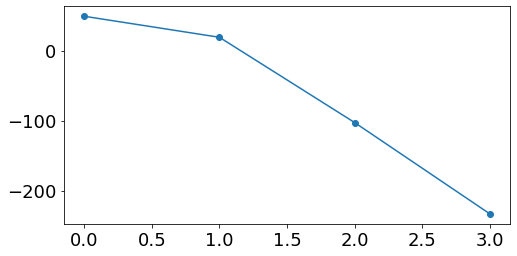

In [19]:
plt.plot(b4.linear_params[:4], '-o')

In [5]:
b.nbfe

array([144653.72969447, 149174.15874742, 153694.58780037, 158215.01685332,
       153835.85120828, 158497.54366913, 163159.23612999, 163300.4995379 ,
       168103.45540666, 173047.67468332])

3.4898271499872475
10.047810996997374
25.106333750225808


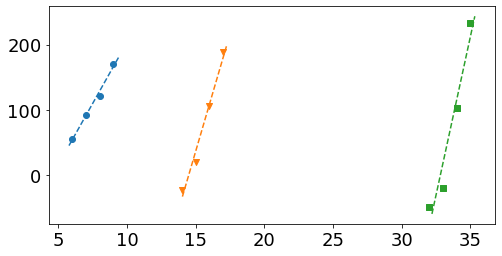

In [20]:
# plot alpha for bond dissociation energy
color = {6:'tab:blue', 14:'tab:orange', 32:'tab:green'}
label = {6:'row 2', 14:'row 3', 32:'row 4'}
marker = {6:'o', 14:'v', 32:'s'}
plt.rcParams['figure.figsize'] = [8,4]

plt.rcParams['font.size'] = 18
fig, ax = plt.subplots(1,1)
for b in [b2, b3, b4]:


    gamma = 1
    alpha = np.linalg.lstsq(b.get_coeff_mat(), -b.ebfe, rcond=None)[0][:4]
    beta = np.linalg.lstsq(b.get_coeff_mat(), -b.ebfe, rcond=None)[0][4:]
    
    Z = np.sort(np.unique(b.Z1))
    
    ax.scatter(Z**(gamma), alpha, color = color[Z[0]], label = label[Z[0]], marker = f'{marker[Z[0]]}')
#     print(alpha)
    
    # linregress
    
    # ylim
    y0 = np.amin(alpha) - 10
    y1 = np.amax(alpha) + 10
    
    
    out = linregress(Z**gamma, alpha)
    x0 = (y0 - out[1])/out[0] #np.amin(-(charges)**(7/3)) - 20
    x1 = (y1 - out[1])/out[0] #np.amax(-(charges)**(7/3)) + 20
#     print(x0, x1)
    x = np.linspace(x0, x1, 1000)
    linf = out[0]*x+out[1]
    ax.plot(x, linf, '--', color = color[Z[0]])
    
    errors = np.abs((out[0]*Z**gamma+out[1] - alpha)).mean()
    print(errors)

# ax.set_xlim([0,4200])
# ax.set_xticks([0, 500, 3500, 4000])
# ax.set_xticklabels(['0','500','3500', '4000'])

# ax.set_yticks([0, 100, 200])
# ax.set_yticklabels(['','',''])
# ax.set_ylabel(r'$\alpha(Z)$')

# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)

# ax.legend(frameon = False)
# plt.savefig('/home/sahre/work/bonding_trends/figures/results/alpha_bde_legend.svg')

### plot of $\alpha$ vs $Z$ individual rows

3.4898271499872475


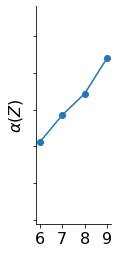

In [71]:
# plot alpha for bond dissociation energy
color = {6:'tab:blue', 14:'tab:orange', 32:'tab:green'}
label = {6:'row 2', 14:'row 3', 32:'row 4'}
marker = {6:'o', 14:'v', 32:'s'}
plt.rcParams['figure.figsize'] = [4/3,4]

plt.rcParams['font.size'] = 16
fig, ax = plt.subplots(1,1)
r=2

if r == 2:
    b = b2
elif r == 3:
    b = b3
elif r ==4:
    b = b4


gamma = 1
alpha = np.linalg.lstsq(b.get_coeff_mat(), -b.ebfe, rcond=None)[0][:4]
beta = np.linalg.lstsq(b.get_coeff_mat(), -b.ebfe, rcond=None)[0][4:]

Z = np.sort(np.unique(b.Z1))

ax.scatter(Z**(gamma), alpha, color = color[Z[0]], label = label[Z[0]], marker = f'{marker[Z[0]]}')
ax.plot(Z**(gamma), alpha, '-', color = color[Z[0]])
#     print(alpha)

# linregress

# ylim
y0 = np.amin(alpha) - 10
y1 = np.amax(alpha) + 10


out = linregress(Z**gamma, alpha)
x0 = (y0 - out[1])/out[0] #np.amin(-(charges)**(7/3)) - 20
x1 = (y1 - out[1])/out[0] #np.amax(-(charges)**(7/3)) + 20
#     print(x0, x1)
x = np.linspace(x0, x1, 1000)
linf = out[0]*x+out[1]
#     ax.plot(x, linf, '--', color = color[Z[0]])

errors = np.abs((out[0]*Z**gamma+out[1] - alpha)).mean()
print(errors)

# ax.set_xlim([0,4200])
ax.set_xticks(Z)
# ax.set_xticklabels(['0','500','3500', '4000'])

if r == 2:
    ax.set_ylabel(r'$\alpha(Z)$')
    ax.set_yticklabels([])
else:
    ax.set_yticks([])
    ax.spines['left'].set_visible(False)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_ylim([-55, 240])
# ax.legend(frameon = False)
plt.savefig(f'/home/sahre/work/bonding_trends/figures/results/alpha_bde_row{r}.svg')

In [50]:
alpha

array([-49.05589478, -19.02439362, 102.78637486, 233.24321101])

0.5148622887490149
0.3037233313241927
0.6160215301357539


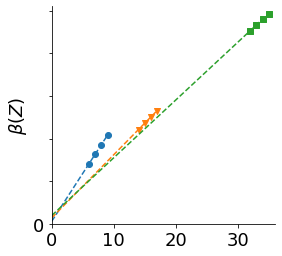

In [40]:
color = {6:'tab:blue', 14:'tab:orange', 32:'tab:green'}
label = {6:'row 2', 14:'row 3', 32:'row 4'}
marker = {6:'o', 14:'v', 32:'s'}

plt.rcParams['font.size'] = 18

plt.rcParams['figure.figsize'] = [4,4]

fig, ax = plt.subplots(1,1)

for b in [b2, b3, b4]:
    gamma = 1
    alpha = np.linalg.lstsq(b.get_coeff_mat(), -b.ebfe, rcond=None)[0][:4]
    beta = np.linalg.lstsq(b.get_coeff_mat(), -b.ebfe, rcond=None)[0][4:]
    
    Z = np.sort(np.unique(b.Z1))
    
    ax.scatter(Z**(gamma), beta, color = color[Z[0]], label = label[Z[0]], marker = f'{marker[Z[0]]}')
    
    
    # linregress
    
    # ylim
    y0 = np.amin(beta) - 10
    y1 = np.amax(beta) + 10
    
    out = linregress(Z**gamma, beta)
    x0 = 0 #np.amin(-(charges)**(7/3)) - 20
    x1 = (y1 - out[1])/out[0] #np.amax(-(charges)**(7/3)) + 20
    x = np.linspace(x0, x1, 1000)
    linf = out[0]*x+out[1]
    ax.plot(x, linf, '--', color = color[Z[0]])
    
    errors = np.abs((out[0]*Z**gamma+out[1] - beta)).mean()
    print(errors)
# ax.plot('')
ax.set_xlim([0, 36])
ax.set_ylim([0, 2550])
ax.set_yticks([0, 500, 1000, 1500, 2000, 2500])
ax.set_yticklabels(['0','','', '', '', ''])
ax.set_ylabel(r'$\beta(Z)$')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('/home/sahre/work/bonding_trends/figures/results/beta_bde.svg')

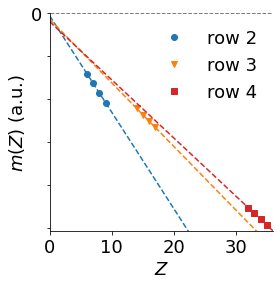

In [29]:
plt.rcParams['figure.figsize'] = [4,4]
plt.rcParams['font.size'] = 18
fig, ax = plt.subplots(1,1)
plot_info = {'row':[b2, b3, b4], 'color':['tab:blue', 'tab:orange', 'tab:red'], 'row_number':['row 2', 'row 3', 'row 4']}

symbol = ['o', 'v', 's', 'D']
for i in range(3):

    charges = sorted(list(set(plot_info['row'][i].Z1)))
    ax.plot(charges, plot_info['row'][i].linear_params[4:], symbol[i], color = plot_info['color'][i], label = plot_info['row_number'][i])
    
    x, y = linear_fit(plot_info['row'][i])
    ax.plot(x, y, '--', color = plot_info['color'][i])

ax.plot([0, 36], [0,0], '--', color = 'tab:gray', linewidth = 1)
ax.set_xlim([0, 36])

x,y = linear_fit(plot_info['row'][2])
ax.set_ylim([np.amin(y),0])

ax.set_xlabel(r'$Z$')
ax.legend(frameon = False)

ax.set_yticks([0,-500,-1000,-1500,-2000, -2500])
ax.set_yticklabels(['0','','','', '', ''])

ax.set_ylabel(r'$m(Z)$ (a.u.)')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#plt.savefig('/home/sahre/work/bonding_trends/figures/results/slopes2.svg', bbox_inches = 'tight')

In [ ]:
-y

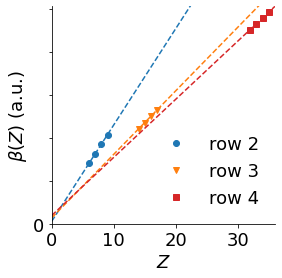

In [30]:
plt.rcParams['figure.figsize'] = [4,4]
plt.rcParams['font.size'] = 18
fig, ax = plt.subplots(1,1)
plot_info = {'row':[b2, b3, b4], 'color':['tab:blue', 'tab:orange', 'tab:red'], 'row_number':['row 2', 'row 3', 'row 4']}

symbol = ['o', 'v', 's', 'D']
for i in range(3):

    charges = sorted(list(set(plot_info['row'][i].Z1)))
    ax.plot(charges, -plot_info['row'][i].linear_params[4:], symbol[i], color = plot_info['color'][i], label = plot_info['row_number'][i])
    
    x, y = linear_fit(plot_info['row'][i])
    ax.plot(x, -y, '--', color = plot_info['color'][i])

ax.plot([0, 36], [0,0], '--', color = 'tab:gray', linewidth = 1)
ax.set_xlim([0, 36])

#x,y = linear_fit(plot_info['row'][2])
ax.set_ylim([0, np.amax(-y)])

ax.set_xlabel(r'$Z$')
ax.legend(frameon = False)

ax.set_yticks(-np.array([0,-500,-1000,-1500,-2000, -2500]))
ax.set_yticklabels(['0','','','', '', ''])

ax.set_ylabel(r'$\beta(Z)$ (a.u.)')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#plt.savefig('/home/sahre/work/bonding_trends/figures/results/slopes2.svg', bbox_inches = 'tight')

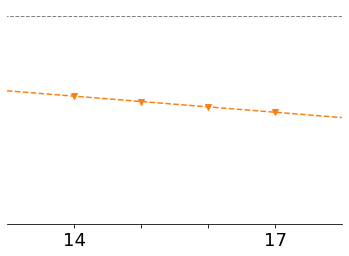

In [33]:
"""
Broken axis manually
"""
settings = 'r3'

if settings == 'origin':
    xlim = [0,1]
    xsize = 0.4
elif settings == 'r2':
    xlim = [5,10]
    xsize = 1.2
elif settings == 'r3':
    xlim = [13, 18]
    xsize = 1.2
elif settings == 'r4':
    xlim = [31,36]
    xsize = 1.2

plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['font.size'] = 18
fig, ax = plt.subplots(1,1)
plot_info = {'row':[b2, b3, b4], 'color':['tab:blue', 'tab:orange', 'tab:red'], 'row_number':['row 2', 'row 3', 'row 4']}

symbol = ['o', 'v', 's', 'D']
for i in range(1,2):

    charges = sorted(list(set(plot_info['row'][i].Z1)))
    ax.plot(charges, plot_info['row'][i].linear_params[4:], symbol[i], color = plot_info['color'][i], label = plot_info['row_number'][i])
    
    x, y = linear_fit(plot_info['row'][i])
    ax.plot(x, y, '--', color = plot_info['color'][i])

ax.plot([0, 36], [0,0], '--', color = 'tab:gray', linewidth = 1)
ax.set_xlim(xlim)


if settings == 'origin':
    ax.set_yticks([0,-1000,-2000,-3000,-4000])
    ax.set_yticklabels(['0','','','', ''])
    ax.set_xticks([0])
    ax.set_xticklabels([0])
    ax.set_ylabel(r'$m(Z)$ (a.u.)')
else:
    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.spines['left'].set_visible(False)
    xticks = np.linspace(xlim[0], xlim[1], 6, dtype=int)
    ax.set_xticks(xticks[1:-1])
    ax.set_xticklabels([str(xticks[1]), '', '', str(xticks[-2])])
    
# if settings == 'r2':
#     xticks = np.linspace(xlim[0], xlim[1], 6, dtype=int)
#     ax.set_xticks(xticks[1:-1])
#     ax.set_xticklabels([str(xticks[1]), '', '', str(xticks[-2])])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#plt.savefig('/home/sahre/work/bonding_trends/figures/results/slopes_r2.svg', bbox_inches = 'tight')

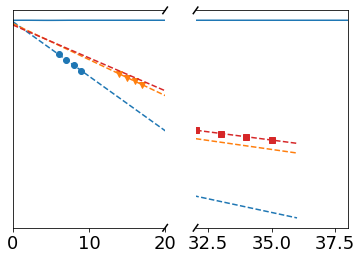

In [34]:
"""
Broken axis example, where the x-axis will have a portion cut out.
"""
import matplotlib.pylab as plt
import numpy as np


x = np.linspace(0,10,100)
x[75:] = np.linspace(40,42.5,25)

y = np.sin(x)

f,(ax,ax2) = plt.subplots(1,2,sharey=True, facecolor='w')

# plot the same data on both axes
ax.plot(x, y)
ax2.plot(x, y)



plot_info = {'row':[b2, b3, b4], 'color':['tab:blue', 'tab:orange', 'tab:red'], 'row_number':['row 2', 'row 3', 'row 4']}

symbol = ['o', 'v', 's', 'D']
for i in range(3):

    charges = sorted(list(set(plot_info['row'][i].Z1)))
    ax.plot(charges, plot_info['row'][i].linear_params[4:], symbol[i], color = plot_info['color'][i], label = plot_info['row_number'][i])
    ax2.plot(charges, plot_info['row'][i].linear_params[4:], symbol[i], color = plot_info['color'][i], label = plot_info['row_number'][i])
    
    x, y = linear_fit(plot_info['row'][i])
    ax.plot(x, y, '--', color = plot_info['color'][i])
    ax2.plot(x, y, '--', color = plot_info['color'][i])

ax.set_xlim(0,20)
ax2.set_xlim(32,38)

# hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax.tick_params(labelright='off')
ax2.yaxis.tick_right()

ax2.get_yaxis().set_ticks([])

# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0,0), (0,1),
# (1,0), and (1,1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'

plt.show()

In [35]:
def linear_fit_n(b):
    charges = np.array(sorted(list(set(b.Z1))))
    m = b.linear_params[:4]

    out = linregress(-(charges)**(7/3), m)
    x0 = np.amin(-(charges)**(7/3)) - 100*charges.mean()/30#+ np.amin(-(charges)**(7/3))*0.1
    x1 = np.amax(-(charges)**(7/3)) + 75*charges.mean()/30#- np.amax(-(charges)**(7/3))*0.1
    x = np.linspace(x0, x1, 10000)
    linf = out[0]*x+out[1]
    return(x, linf)

-236.5381418791018 41.49443327385869
-4080.816924200968 -3297.3447046543365


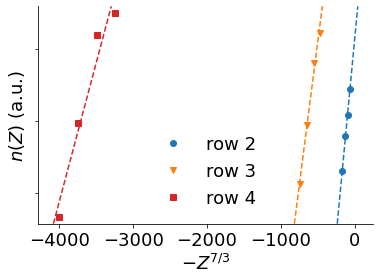

In [141]:
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['font.size'] = 18
fig, ax = plt.subplots(1,1)
plot_info = {'row':[b2, b3, b4], 'color':['tab:blue', 'tab:orange', 'tab:red'], 'row_number':['row 2', 'row 3', 'row 4'], 'symbol':['o', 'v', 's', 'D']}


# ylim
y0 = np.amin(plot_info['row'][2].linear_params[:4]) - 10
y1 = np.amax(plot_info['row'][2].linear_params[:4]) + 10
ax.set_ylim([y0, y1])

# row 2
i = 0
charges = np.array(sorted(list(set(plot_info['row'][i].Z1))))
ax.plot(-(charges)**(7/3), plot_info['row'][i].linear_params[:4], plot_info['symbol'][i], color = plot_info['color'][i], label = plot_info['row_number'][i])

# linregress
out = linregress(-(charges)**(7/3), plot_info['row'][i].linear_params[:4])
x0 = (y0 - out[1])/out[0] #np.amin(-(charges)**(7/3)) - 20
x1 = (y1 - out[1])/out[0] #np.amax(-(charges)**(7/3)) + 20
x = np.linspace(x0, x1, 1000)
linf = out[0]*x+out[1]
ax.plot(x, linf, '--', color = plot_info['color'][i])
print(x0, x1)
# row 3
i = 1
charges = np.array(sorted(list(set(plot_info['row'][i].Z1))))
ax.plot(-(charges)**(7/3), plot_info['row'][i].linear_params[:4], plot_info['symbol'][i], color = plot_info['color'][i], label = plot_info['row_number'][i])

# linregress
out = linregress(-(charges)**(7/3), plot_info['row'][i].linear_params[:4])
x0 = (y0 - out[1])/out[0] #np.amin(-(charges)**(7/3)) - 20
x1 = (y1 - out[1])/out[0] #np.amax(-(charges)**(7/3)) + 20
x = np.linspace(x0, x1, 1000)
linf = out[0]*x+out[1]
ax.plot(x, linf, '--', color = plot_info['color'][i])

# row 4
i = 2
charges = np.array(sorted(list(set(plot_info['row'][i].Z1))))
ax.plot(-(charges)**(7/3), plot_info['row'][i].linear_params[:4], plot_info['symbol'][i], color = plot_info['color'][i], label = plot_info['row_number'][i])

# linregress
out = linregress(-(charges)**(7/3), plot_info['row'][i].linear_params[:4])
x0 = (y0 - out[1])/out[0] #np.amin(-(charges)**(7/3)) - 20
x1 = (y1 - out[1])/out[0] #np.amax(-(charges)**(7/3)) + 20

print(x0, x1)
x = np.linspace(x0, x1, 1000)
linf = out[0]*x+out[1]
ax.plot(x, linf, '--', color = plot_info['color'][i])

ax.set_xlabel(r'$-Z^{7/3}$')

ax.legend(frameon = False)

ax.set_ylabel(r'$n(Z)$ (a.u.)')

ax.set_yticks([0,-100, -200])
ax.set_yticklabels([])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# plt.savefig('/home/sahre/work/bonding_trends/figures/results/intercepts.svg', bbox_inches = 'tight')

In [ ]:
plt.rcParams['figure.figsize'] = [2,4]
plt.rcParams['font.size'] = 18
fig, ax = plt.subplots(1,1)
plot_info = {'row':[b2, b3, b4], 'color':['tab:blue', 'tab:orange', 'tab:red'], 'row_number':['row 2', 'row 3', 'row 4'], 'symbol':['o', 'v', 's', 'D']}


# ylim
y0 = np.amin(plot_info['row'][2].linear_params[:4]) - 10
y1 = np.amax(plot_info['row'][2].linear_params[:4]) + 10
ax.set_ylim([y0, y1])

# row 2
i = 0
charges = np.array(sorted(list(set(plot_info['row'][i].Z1))))
ax.plot(-(charges)**(7/3), plot_info['row'][i].linear_params[:4], plot_info['symbol'][i], color = plot_info['color'][i], label = plot_info['row_number'][i])

# linregress
out = linregress(-(charges)**(7/3), plot_info['row'][i].linear_params[:4])
x0 = (y0 - out[1])/out[0] #np.amin(-(charges)**(7/3)) - 20
x1 = (y1 - out[1])/out[0] #np.amax(-(charges)**(7/3)) + 20
x = np.linspace(x0, x1, 1000)
linf = out[0]*x+out[1]
ax.plot(x, linf, '--', color = plot_info['color'][i])

# row 3
i = 1
charges = np.array(sorted(list(set(plot_info['row'][i].Z1))))
ax.plot(-(charges)**(7/3), plot_info['row'][i].linear_params[:4], plot_info['symbol'][i], color = plot_info['color'][i], label = plot_info['row_number'][i])

# linregress
out = linregress(-(charges)**(7/3), plot_info['row'][i].linear_params[:4])
x0 = (y0 - out[1])/out[0] #np.amin(-(charges)**(7/3)) - 20
x1 = (y1 - out[1])/out[0] #np.amax(-(charges)**(7/3)) + 20
x = np.linspace(x0, x1, 1000)
linf = out[0]*x+out[1]
ax.plot(x, linf, '--', color = plot_info['color'][i])

# row 4
i = 2
charges = np.array(sorted(list(set(plot_info['row'][i].Z1))))
ax.plot(-(charges)**(7/3), plot_info['row'][i].linear_params[:4], plot_info['symbol'][i], color = plot_info['color'][i], label = plot_info['row_number'][i])

# linregress
out = linregress(-(charges)**(7/3), plot_info['row'][i].linear_params[:4])
x0 = (y0 - out[1])/out[0] #np.amin(-(charges)**(7/3)) - 20
x1 = (y1 - out[1])/out[0] #np.amax(-(charges)**(7/3)) + 20
x = np.linspace(x0, x1, 1000)
linf = out[0]*x+out[1]
ax.plot(x, linf, '--', color = plot_info['color'][i])

#ax.set_xlabel(r'$-Z^{7/3}$')
ax.set_xlim([-4250, -3000])
ax.set_xticks([-4000, -3750, -3500, -3250])
ax.set_xticklabels(['-4000','','','-3250'])
ax.set_ylabel(r'$n(Z)$ (a.u.)')
ax.set_yticks([0,-100, -200])
ax.set_yticklabels([])

# ax.set_xlim([-1000, 250])
# ax.set_xticks([0, -250, -500, -750])
# ax.set_xticklabels(['0','','-500',''])
# ax.spines['left'].set_visible(False)
# ax.set_yticks([])
# ax.set_yticklabels([])




ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#plt.savefig('/home/sahre/work/bonding_trends/figures/results/intercepts_r4.svg', bbox_inches = 'tight')

In [ ]:
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['font.size'] = 18
fig, ax = plt.subplots(1,1)
plot_info = {'row':[b2, b3, b4], 'color':['tab:blue', 'tab:orange', 'tab:red'], 'row_number':['row 2', 'row 3', 'row 4'], 'symbol':['o', 'v', 's', 'D']}


# ylim
y0 = np.amin(-plot_info['row'][2].linear_params[:4]) - 10
y1 = np.amax(-plot_info['row'][2].linear_params[:4]) + 10
ax.set_ylim([y0, y1])

# row 2
i = 0
charges = np.array(sorted(list(set(plot_info['row'][i].Z1))))
ax.plot((charges)**(7/3), -plot_info['row'][i].linear_params[:4], plot_info['symbol'][i], color = plot_info['color'][i], label = plot_info['row_number'][i])

# linregress
out = linregress((charges)**(7/3), -plot_info['row'][i].linear_params[:4])
x0 = (y0 - out[1])/out[0] #np.amin(-(charges)**(7/3)) - 20
x1 = (y1 - out[1])/out[0] #np.amax(-(charges)**(7/3)) + 20
x = np.linspace(x0, x1, 1000)
linf = out[0]*x+out[1]
ax.plot(x, linf, '--', color = plot_info['color'][i])

# row 3
i = 1
charges = np.array(sorted(list(set(plot_info['row'][i].Z1))))
ax.plot((charges)**(7/3), -plot_info['row'][i].linear_params[:4], plot_info['symbol'][i], color = plot_info['color'][i], label = plot_info['row_number'][i])

# linregress
out = linregress((charges)**(7/3), -plot_info['row'][i].linear_params[:4])
x0 = (y0 - out[1])/out[0] #np.amin(-(charges)**(7/3)) - 20
x1 = (y1 - out[1])/out[0] #np.amax(-(charges)**(7/3)) + 20
x = np.linspace(x0, x1, 1000)
linf = out[0]*x+out[1]
ax.plot(x, linf, '--', color = plot_info['color'][i])

# row 4
i = 2
charges = np.array(sorted(list(set(plot_info['row'][i].Z1))))
ax.plot((charges)**(7/3), -plot_info['row'][i].linear_params[:4], plot_info['symbol'][i], color = plot_info['color'][i], label = plot_info['row_number'][i])

# linregress
out = linregress((charges)**(7/3), -plot_info['row'][i].linear_params[:4])
x0 = (y0 - out[1])/out[0] #np.amin(-(charges)**(7/3)) - 20
x1 = (y1 - out[1])/out[0] #np.amax(-(charges)**(7/3)) + 20
x = np.linspace(x0, x1, 1000)
linf = out[0]*x+out[1]
ax.plot(x, linf, '--', color = plot_info['color'][i])

ax.set_yticklabels([])
ax.set_xticklabels([])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlabel(r'$Z^{7/3}$')

ax.legend(frameon = False)

ax.set_ylabel(r'$\alpha(Z)$ (a.u.)')

## Rounded Parameters

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import sys
sys.path.insert(0, '/home/sahre/git_repositories/APDFT/prototyping/atomic_energies/')
import utils_qm as uqm
import bt_tools as bt

In [2]:
data = pd.read_csv('/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/energies_homolytic.csv')
data_2 = data.loc[(data['Z1'] >= 6) & (data['Z1'] <= 9) & (data['Z2'] >= 6) & (data['Z2'] <= 9)].to_dict('list')
data_3 = data.loc[(data['Z1'] >= 14) & (data['Z2'] >= 14) & (data['Z1'] <= 17) & (data['Z2'] <= 17)].to_dict('list')
data_4 = data.loc[(data['Z1'] >= 32) & (data['Z2'] >= 32) & (data['Z1'] <= 35) & (data['Z2'] <= 35)].to_dict('list')
data_234 = data.loc[(data['Z1'] <= 9) & (data['Z2'] <= 9) | (data['Z1'] >= 14) & (data['Z2'] >= 14) & (data['Z1'] <= 17) & (data['Z2'] <= 17) | (data['Z1'] >= 32) & (data['Z2'] >= 32) & (data['Z1'] <= 35) & (data['Z2'] <= 35)].to_dict('list')

for d in [data_2, data_3, data_4, data_234]:
    d['unit'] = 630
    d['bfe type'] = 'homo'
    #d['nbfe'] = np.array(d['Z1'])*np.array(d['Z2'])-(np.array(d['Z1'])+np.array(d['Z2']))

In [5]:
def binding_model(ZA, ZB, a, b, c):
    E_AB = a - b*ZA*ZB + c*(ZA**(7/3) + ZB**(7/3))
    return(E_AB)

(215.7, 10.5, 2.0)

In [28]:
data_dict = data_2
a, b, c =  np.round(215.743, 1), np.round(10.470, 2), np.round(1.987, 2)
E_AB = []
for ZA, ZB in zip(data_dict['Z1'], data_dict['Z2']):
    E_AB.append(binding_model(ZA, ZB, a, b, c))
    
E_AB = np.array(E_AB)
E_AB_ref = -630*np.array(data_dict['bfe'])

np.round((np.abs(E_AB - E_AB_ref)).mean(),1)

1.0

In [54]:
data_dict = data_3
a, b, c =  np.round(392.717, 1), np.round(8.823, 2), np.round(1.496 , 3)
E_AB = []
for ZA, ZB in zip(data_dict['Z1'], data_dict['Z2']):
    E_AB.append(binding_model(ZA, ZB, a, b, c))
    
E_AB = np.array(E_AB)
E_AB_ref = -630*np.array(data_dict['bfe'])

print(np.round((np.abs(E_AB - E_AB_ref)).mean(),1))

print(a, b, c)



2.6
392.7 8.82 1.496


In [51]:
data_dict = data_4
a, b, c =  np.round(1109.237, 1), np.round(6.180, 2), np.round(0.813 , 3)
E_AB = []
for ZA, ZB in zip(data_dict['Z1'], data_dict['Z2']):
    E_AB.append(binding_model(ZA, ZB, a, b, c))
    
E_AB = np.array(E_AB)
E_AB_ref = -630*np.array(data_dict['bfe'])

print(np.round((np.abs(E_AB - E_AB_ref)).mean(),1))

print(a, b, c)

2.2
1109.2 6.18 0.813
